In [1]:
from specim.specfuncs import spec1d
from keckcode.deimos import deimosmask1d
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
file_loc = '../galaxy_spectra/LRIS_data/LRIS_red_data_20201120/keck_lris_red_B/Science/*'

In [3]:
file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'spec1d' in p and 'J0805' in p:
        if '.fits' in p:
            file_list.append(p)

In [4]:
spec = deimosmask1d.DeimosMask1d(file_list[0])
info = spec.slitinfo
print(info)

Reading 1 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0043-J0805+6919_LRISr_2020Nov21T152211.856.fits
det slitid objid spatloc        fwhm      
--- ------ ----- ------- -----------------
  2    291     1     110 17.08220817866308


In [5]:
specid = [] #np.zeros(coadded_spectra.nspec)

for i in range(spec.nspec):
    spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
    specid.append(spec_id)
    print(spec_id)

2_291_1_110


<IPython.core.display.Javascript object>


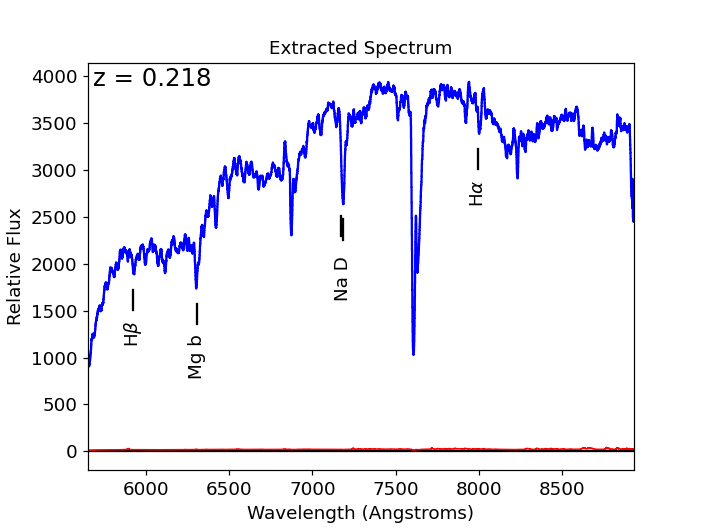


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       5920.70
Mg I (b)      5176.00       6304.37
Na I (D)      5889.95       7173.96
Na I (D)      5895.92       7181.23
H-alpha       6562.80       7993.49



In [6]:
%matplotlib notebook
spec[specid[0]].smooth(11)
spec[specid[0]].mark_lines('abs', z=0.218, usesmooth=True)